In [3]:
%config IPCompleter.use_jedi=False

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data =pd.read_csv(r"C:\Users\busani\Desktop\word hapiness report\2021.csv")

pd.set_option("display.max_columns", 20)
data.tail(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [5]:
data.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

### Setting up visual libriaries


In [6]:
sns.set_style("darkgrid")
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams["figure.facecolor"]= "#FFE5B4"

##### Data Preprocessing

In [7]:
#Taking columns we need and creating a new variable

data_columns = ["Country name", "Regional indicator","Ladder score", "Logged GDP per capita", "Social support", "Healthy life expectancy","Freedom to make life choices","Generosity", "Perceptions of corruption"]

In [8]:
data =  data[data_columns].copy()

In [9]:
# Creating a new variable and Renaming columns 
data.head(5)



,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [10]:
# Renaming columns to avoid spaces inbetween names

data.columns=["Country_name","Regional_indicator","Ladder_score","Logged_GDP_per_capita","Social_support","Healthy_life_expectancy","Freedom_to_make_life_choices","Generosity","Perceptions_of_corruption"]

In [11]:
data.head(5)

,Country_name,Regional_indicator,Ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [12]:
#Checking for null values

data.isnull().sum()

Country_name                    0
Regional_indicator              0
Ladder_score                    0
Logged_GDP_per_capita           0
Social_support                  0
Healthy_life_expectancy         0
Freedom_to_make_life_choices    0
Generosity                      0
Perceptions_of_corruption       0
dtype: int64

Text(0, 0.5, 'GDP per capita')

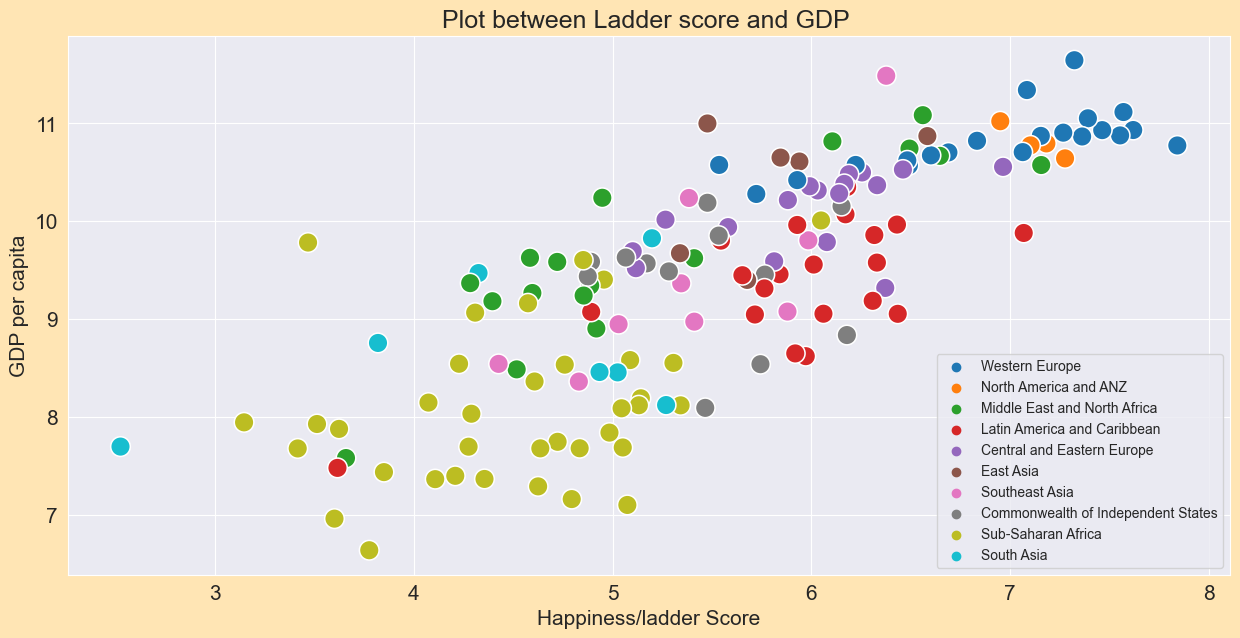

In [13]:
# Plotting between Ladder score and GDP

plt.rcParams["figure.figsize"] = 15,7
plt.title("Plot between Ladder score and GDP ")
sns.scatterplot(x = data.Ladder_score, y = data.Logged_GDP_per_capita, hue = data.Regional_indicator, s=200); 
plt.legend(loc= "lower right", fontsize = "10")
plt.xlabel("Happiness/ladder Score")
plt.ylabel("GDP per capita")


##### Analysis of Plot between Laader score and GDP

#####
     * Most Sub-Saharan African countries rank low in the Happiness/Ladder score (most of them laying below 6) whilst most Western European countries have the highest Happiness/Ladder scores of over 7
     * Most Sub-Saharan African countries have the lowest GDP per capita of less than 9 whereas most Western European countries have the hightest GDP pre capita  

In [14]:
gdp_region = data.groupby("Regional_indicator")["Logged_GDP_per_capita"].sum()
gdp_region

Regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: Logged_GDP_per_capita, dtype: float64

Text(0, 0.5, '')

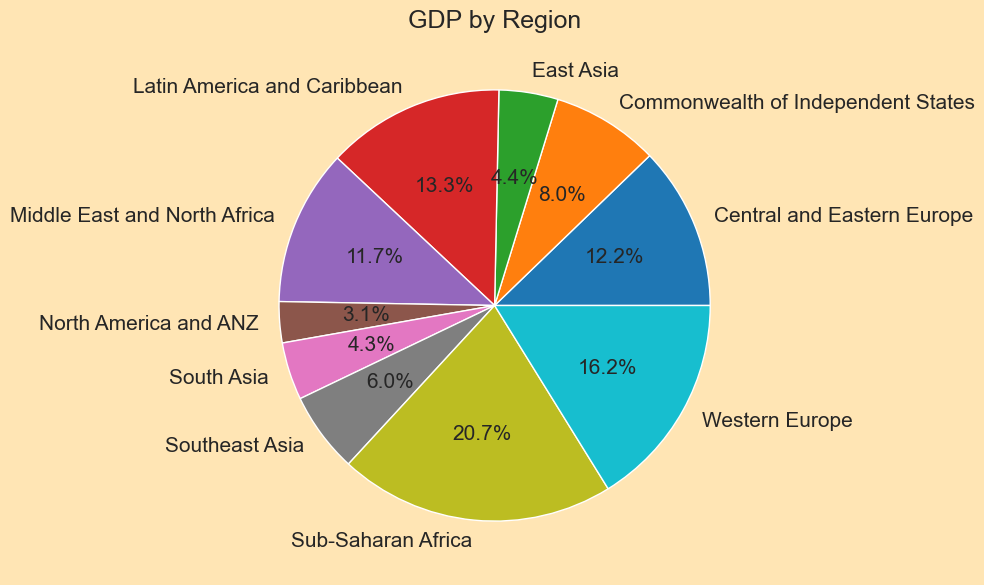

In [15]:
#Plotting GDP according to Regional_indicator

gdp_region.plot.pie(autopct = "%1.1f%%")
plt.title("GDP by Region")
plt.ylabel("")

#### World's GDP contribution by each region in percentages
#####     
     * Sub-Saharaan Africa has the highest countribution with 20.7% probably due to the fact that there were far more African countries in the study than any other region
     * Western Europe has the second highest countribution with 16.2%
     * Central and Eastern Europe has the third highest countribution with 12.2%
     * North America and ANZ has the lowest contribution with 3.1% probably due to number of countries that were in the study for this region
     * South Asia has the second lowest contribution with 4.3%

In [16]:
#Total countries in each region

total_countries = data.groupby("Regional_indicator")[["Country_name"]].count()
total_countries

,Country_name
Regional_indicator,
Central and Eastern Europe,17
Commonwealth of Independent States,12
East Asia,6
Latin America and Caribbean,20
Middle East and North Africa,17
North America and ANZ,4
South Asia,7
Southeast Asia,9
Sub-Saharan Africa,36


C:\Users\busani\AppData\Local\Temp\ipykernel_16348\2078156491.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor, mask= np.zeros_like(cor,dtype=np.bool),


<AxesSubplot:>

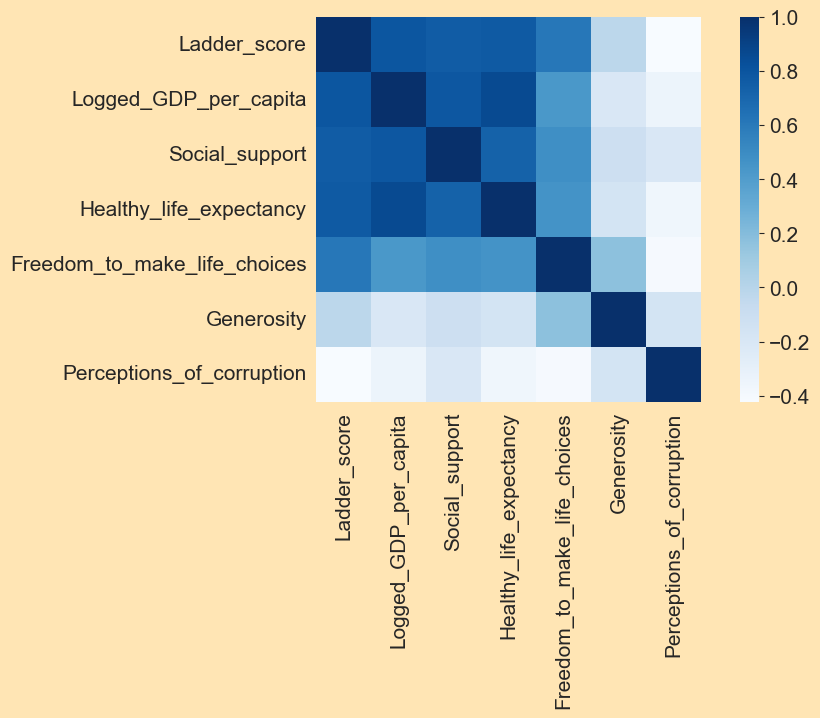

In [17]:
#Checking for corelation between the variables in the dataset

cor = data.corr(method="pearson")
f, ax = plt.subplots(figsize = (10,5))
sns.heatmap(cor, mask= np.zeros_like(cor,dtype=np.bool),
            cmap="Blues", square=True,ax=ax)

<AxesSubplot:>

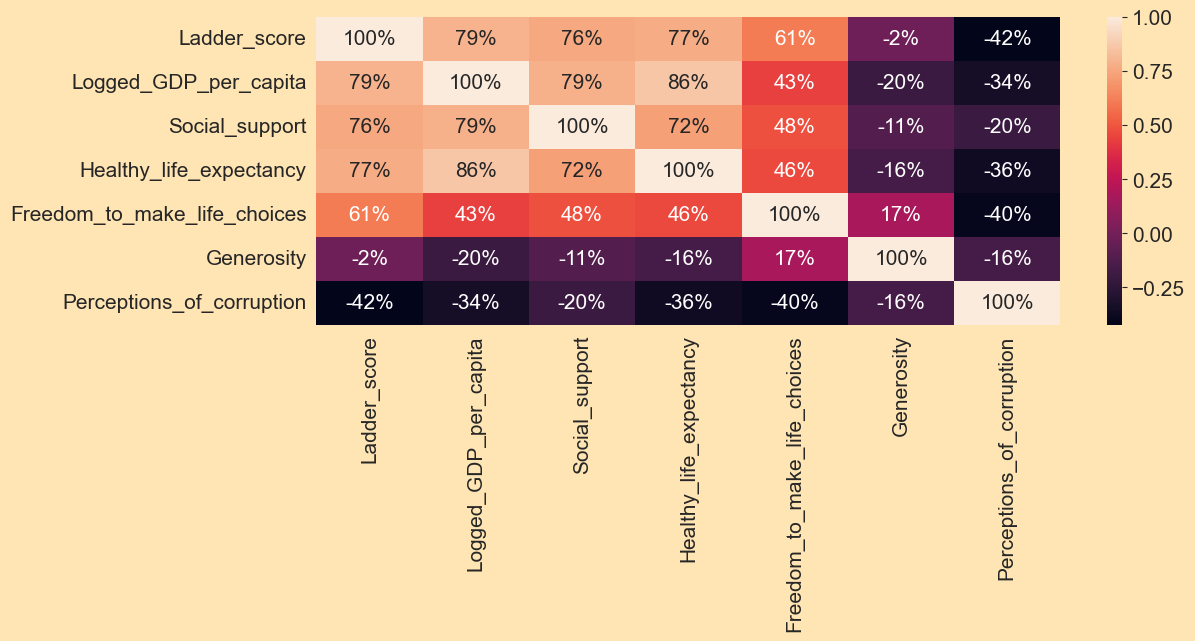

In [18]:
plt.figure(figsize=(12,4))
sns.heatmap(data.corr(), annot=True, fmt=".0%")

#### Analysis of corelation between the variables in the dataset
##### 
     * There seems to be a high +correlation Ladder_score "aka" Happiness score with Logged_GPD_per_capita, Social_support, Healthy_life_expectancy of over 70%  

In [19]:
#Checking rate of corrption according to regions

corruption = data.groupby("Regional_indicator")[["Perceptions_of_corruption"]].mean()
corruption

,Perceptions_of_corruption
Regional_indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


<BarContainer object of 10 artists>

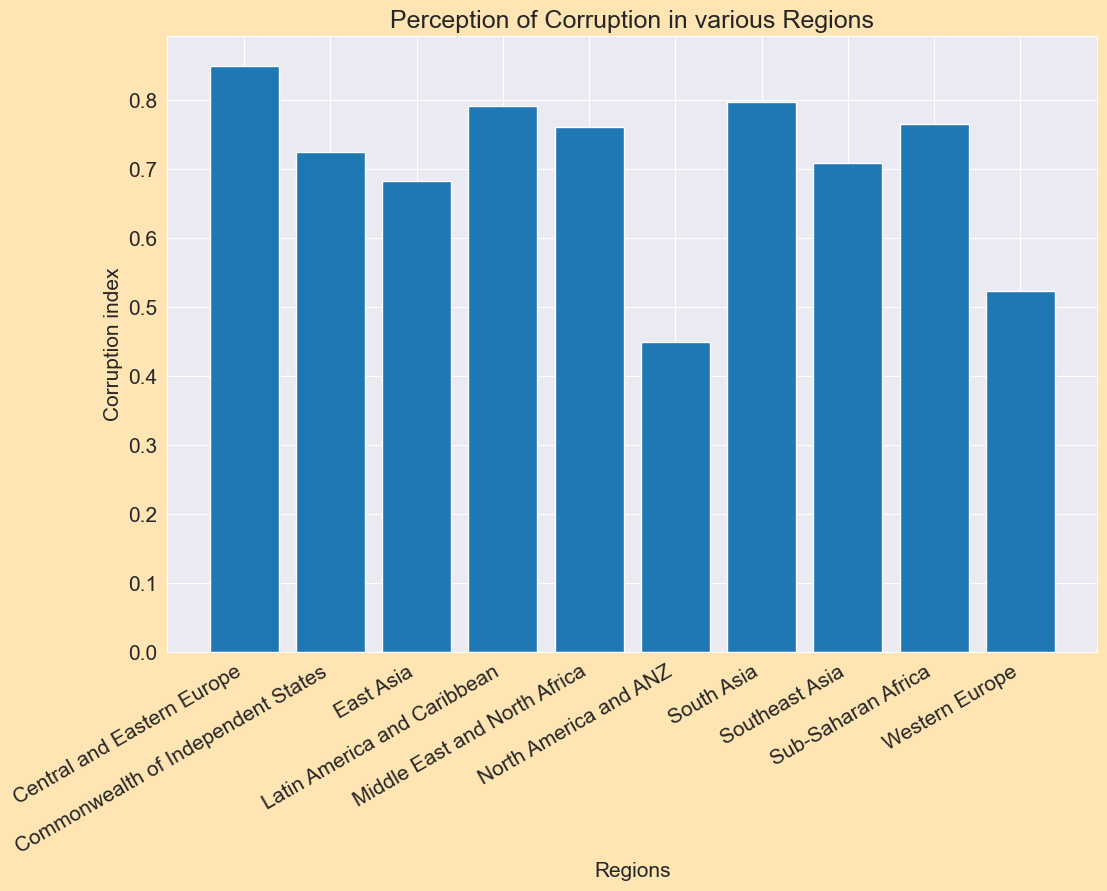

In [20]:
plt.rcParams["figure.figsize"] = (12,8)
plt.title("Perception of Corruption in various Regions")
plt.xlabel("Regions", fontsize = 15)
plt.ylabel("Corruption index", fontsize = 15)
plt.xticks(rotation = 30, ha="right")
plt.bar(corruption.index, corruption.Perceptions_of_corruption)


#### Analysis of Perceptions_of_corruption
    * Central and Eastern Europe has the highest corruption according to the questions that were asked in the study whilst North America and ANZ had the lowest corruption 

In [21]:
#Finding  life expectancy of the top 10 happiest countries as well sthe bottom 10

top_10 = data.head(10) # first make a variable of the top 10 countries
bottom_10 = data.tail(10) # make a variable containing the bottom 10 countries



C:\Users\busani\AppData\Local\Temp\ipykernel_16348\931024093.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels, rotation=45, ha="right")
C:\Users\busani\AppData\Local\Temp\ipykernel_16348\931024093.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels, rotation=45, ha="right")


Text(831.8358585858584, 0.5, 'Life Expectancy')

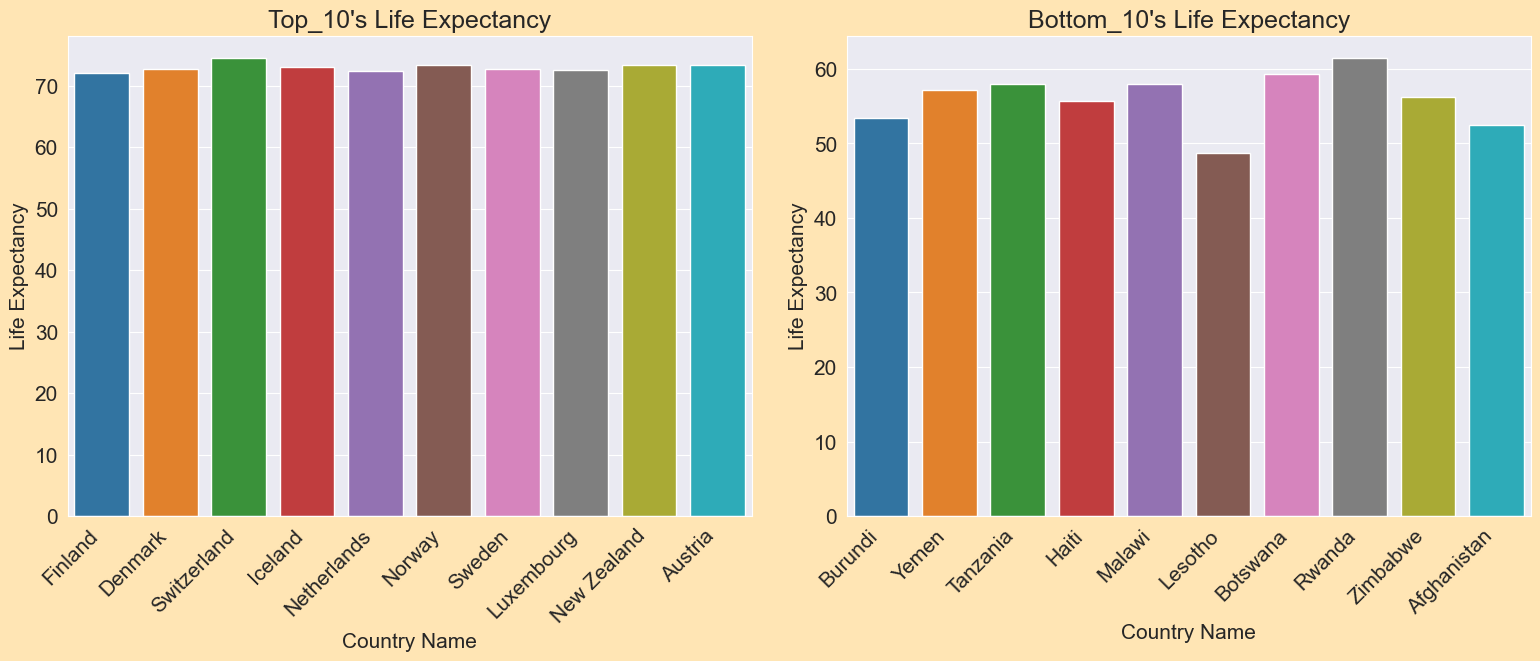

In [22]:
# Visualizing life expectancy of the top 10 happiest countries

fig, axes= plt.subplots(1,2, figsize= (16,6))
plt.tight_layout(pad=2)
xlabels= top_10.Country_name
axes[0].set_title("Top_10's Life Expectancy")
axes[0].set_xticklabels(xlabels, rotation=45, ha="right")
sns.barplot(x=top_10.Country_name, y= top_10.Healthy_life_expectancy, ax=axes[0])
axes[0].set_xlabel("Country Name")
axes[0].set_ylabel("Life Expectancy")

#Visualization of life expectancy of the bottom 10 happy countries

xlabels= bottom_10.Country_name
axes[1].set_title("Bottom_10's Life Expectancy")
axes[1].set_xticklabels(xlabels, rotation=45, ha="right")
sns.barplot(x=bottom_10.Country_name, y= bottom_10.Healthy_life_expectancy, ax=axes[1])
axes[1].set_xlabel("Country Name")
axes[1].set_ylabel("Life Expectancy")


#### Analysis of Life Expectancy for the Top 10 happiest countries and Top 10 Bottom happiest countries
#####
     *On an avarage 70 years is the Life Expectancy for the Top 10 happiest countries whereas for the Bottom 10 happiest countries it is below 60 years.
     *Switzerland life expectancy is 25 years more than that of Lesotho

Text(0, 0.5, 'Happiness Score')

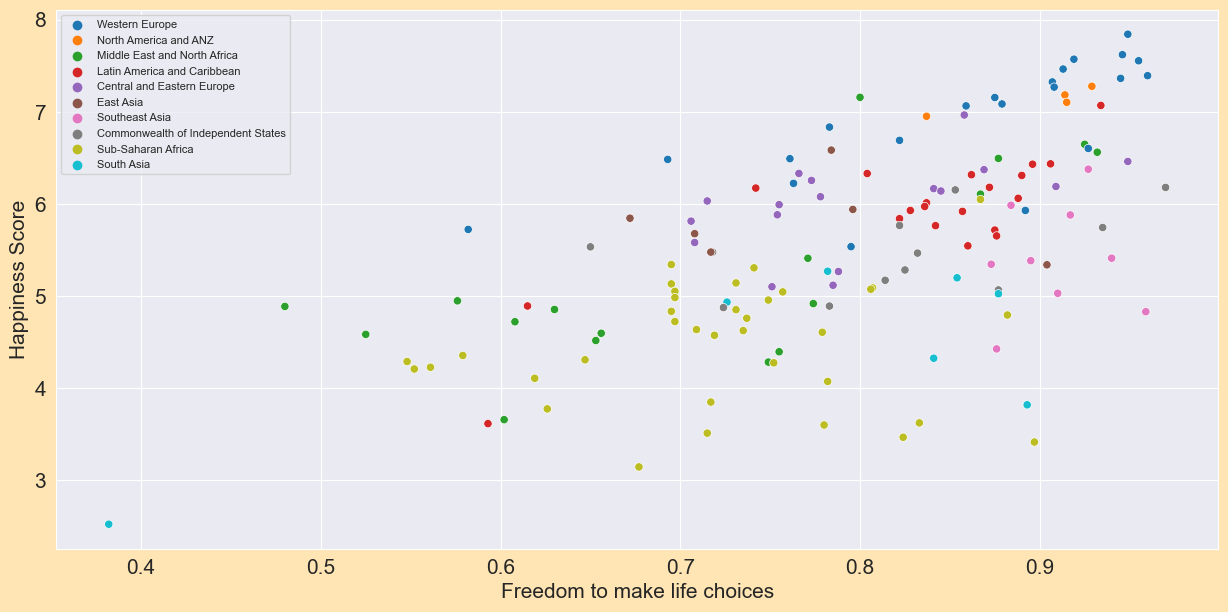

In [23]:
#Visualizing Freedom to make life choices in relation to ladder score/hapiness score accourding to region

plt.rcParams["figure.figsize"]= (15, 7)
sns.scatterplot(x= data.Freedom_to_make_life_choices, y=data.Ladder_score, hue=data.Regional_indicator)
plt.legend(loc="upper left", fontsize= "8")
plt.xlabel("Freedom to make life choices")
plt.ylabel("Happiness Score")

<BarContainer object of 10 artists>

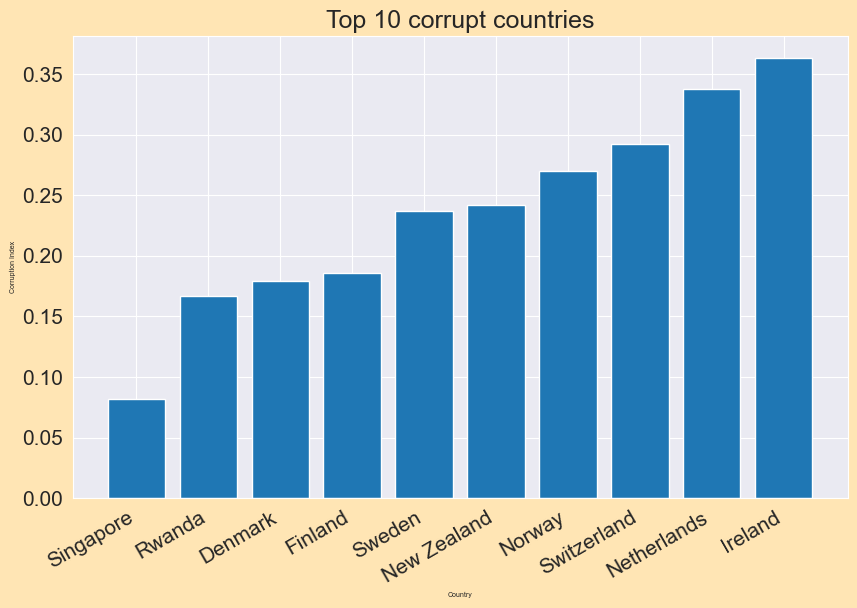

In [24]:
#Analysing most corrupt countries
top_10_corrupt =data.sort_values(by="Perceptions_of_corruption").head(10)
plt.rcParams["figure.figsize"] = (10, 6)
plt.title("Top 10 corrupt countries")
plt.xlabel("Country", fontsize=5)
plt.ylabel("Corruption Index", fontsize=5)
plt.xticks(rotation= 30, ha="right")
plt.bar(top_10_corrupt.Country_name, top_10_corrupt.Perceptions_of_corruption)

Text(0, 0.5, 'Corruption')

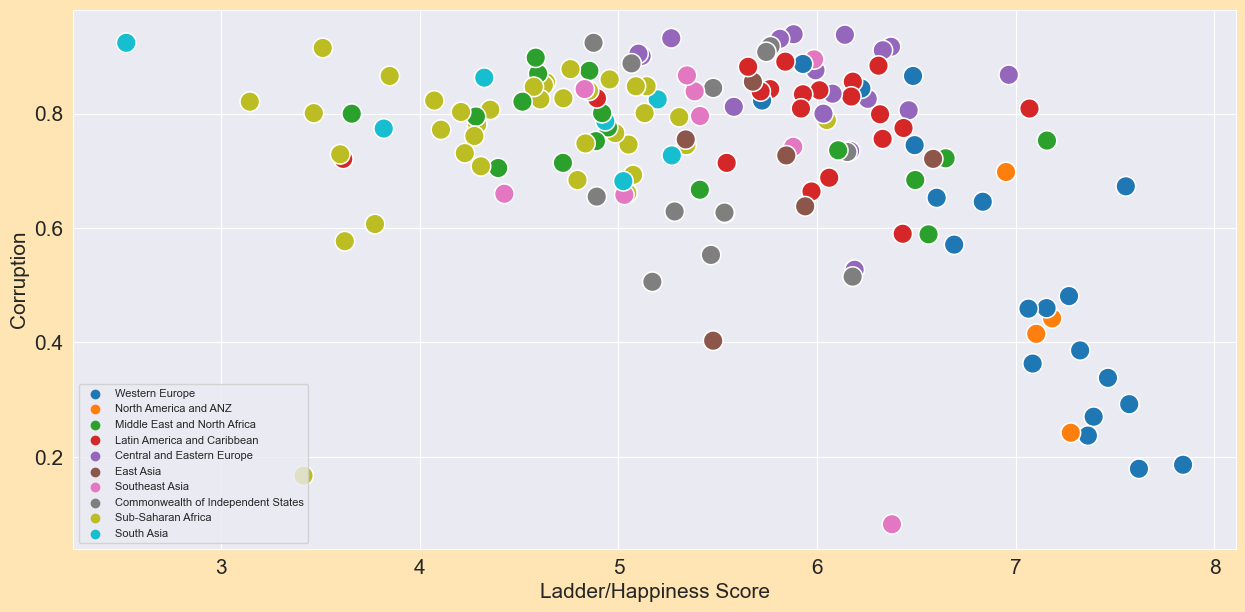

In [25]:
#CORRUPTION VS HAPPINESS

plt.rcParams["figure.figsize"]=(15,7)
sns.scatterplot(x = data.Ladder_score, y= data.Perceptions_of_corruption, hue= data.Regional_indicator, s=200)
plt.legend(loc="lower left", fontsize= "8")
plt.xlabel("Ladder/Happiness Score")
plt.ylabel("Corruption")

##### By: Siyabonga M. Gamedze